Write a function that given a list of 3D points, draw the given list as a point cloud.

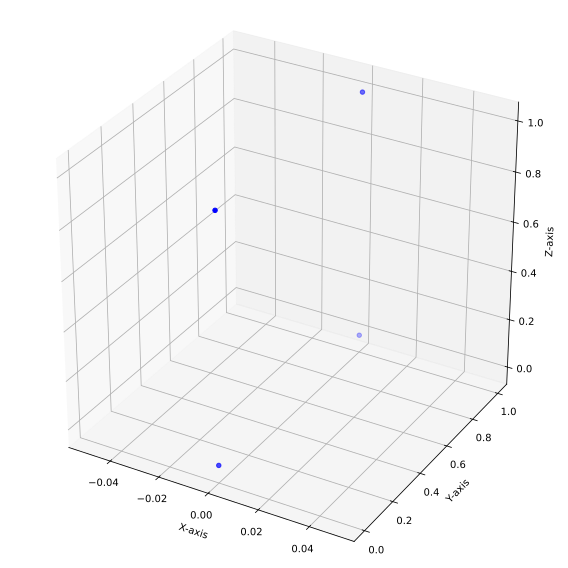

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%config InlineBackend.figure_format = 'svg'
def draw_point_cloud(points):
    """
    Given a list of 3D points, draw the point cloud.
    :param points: List of tuples or lists, where each element is (x, y, z)
    """
    fig = plt.figure(figsize=(8, 8), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    # Unzip the points into x, y, z coordinates
    x, y, z = zip(*points)
    ax.scatter(x, y, z, c='b', marker='o')
    # Set the aspect ratio to be equal
    ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1
    # Show grid
    ax.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('ellipsoid_f1.pdf')
    plt.show()

draw_point_cloud([(0,0,0), (0,1,0), (0,0,1), (0,1,1)])


z^TMz = c, with M positive definite and c > 0 defines an ellipsoid (high-dimensional ellipse). Draw a half ellipsoid in 3D with the following randomly generated M and c=300. The half-ellipsoid should be illustrated with at least 2500 points in 3D.

(100, 3)


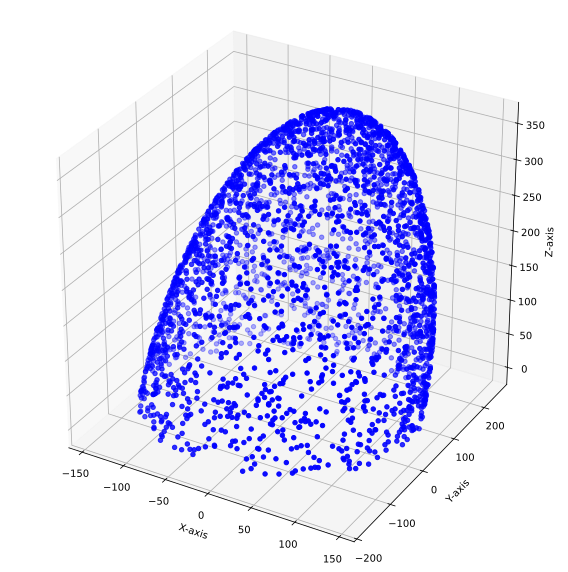

In [ ]:
import numpy as np
"""
z^TMz = c, with M positive definite and c > 0 defines an ellipsoid (high-dimensional ellipse). Draw a half ellipsoid in 3D with the following randomly generated M and c=300. The half-ellipsoid should be illustrated with at least 2500 points in 3D.
"""
np.random.seed(42)
cov_mat = [[1, 0.5, 0.3],[0.5, 1, 0.2],[0.3, 0.2, 1]]
X = np.random.multivariate_normal([0.0, 1.0, 2.0], cov_mat,  (100))
print(X.shape)
XTX = X.transpose().dot(X)
M = XTX
c = 300
def draw_half_ellipsoid(M, c, num_points=10000):
    """
    Draw a half-ellipsoid defined by the equation z^TMz = c.
    :param M: Positive definite matrix
    :param c: Constant
    :param num_points: Number of points to generate
    """
    # Generate random points on the surface of the ellipsoid
    points = np.random.randn(num_points, 3)
    points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]  # Normalize to unit sphere
    points = points * np.sqrt(c)  # Scale to the ellipsoid size

    # Transform points using the matrix M
    transformed_points = points @ np.linalg.cholesky(M).T

    # Filter out negative z values to get the half-ellipsoid
    transformed_points = transformed_points[transformed_points[:, 2] >= 0]

    draw_point_cloud(transformed_points)
draw_half_ellipsoid(M, c, num_points=6000)